# Assignment 2

## Exercise 1

In [5]:
import wrds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
db = wrds.Connection(wrds_username='jonkq')
db.create_pgpass_file()

Enter your WRDS username [jonkq]:jonkq
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
There was an error with your password.


OperationalError: (psycopg2.OperationalError) server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [4]:
#aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='1999-12-31' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

#gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='1999-12-31' and date<='2020-12-31'")
gs.to_csv('gs.csv')

#msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='1999-12-31' and date<='2020-12-31'")
msft.to_csv('msft.csv')

#pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='1999-12-31' and date<='2020-12-31'")
pg.to_csv('pg.csv')

#ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='1999-12-31' and date<='2020-12-31'")
ge.to_csv('ge.csv')

NameError: name 'aapl' is not defined

#### a)

In [12]:
aapl.date = pd.to_datetime(aapl.date)
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'gs':gs,
                   'msft':msft, 'pg':pg, 'ge':ge})
ret = ret.set_index('date')

print('Mean of daily returns:',ret.apply(np.mean),sep='\n')
print('\nStd of daily returns:',ret.apply(np.std),sep='\n')

Mean of daily returns:
aapl    0.001317
gs      0.000522
msft    0.000526
pg      0.000378
ge      0.000046
dtype: float64

Std of daily returns:
aapl    0.025622
gs      0.023606
msft    0.019470
pg      0.013628
ge      0.021166
dtype: float64


#### b)

##### AAPL

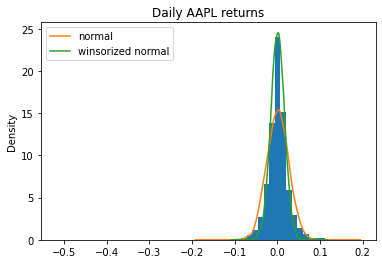

In [13]:
N = len(ret)
norm_aapl = pd.Series(np.random.normal(ret.aapl.mean(),ret.aapl.std(),N))
aapl_w = ret.aapl
aapl_w = aapl_w.where(np.abs(aapl_w)<0.04)
norm_aapl_w = pd.Series(np.random.normal(aapl_w.mean(),aapl_w.std(),N))

plt.title('Daily AAPL returns')
plt.hist(ret.aapl, bins=50, density=True);
norm_aapl.plot.kde(label='normal');
norm_aapl_w.plot.kde(label='winsorized normal');
plt.legend();

##### GS

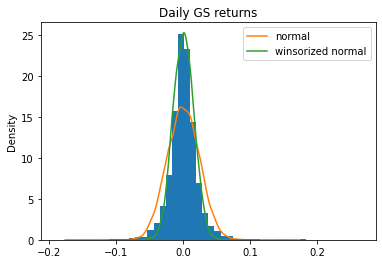

In [14]:
norm_gs = pd.Series(np.random.normal(ret.gs.mean(),ret.gs.std(),N))
gs_w = ret.gs
gs_w = gs_w.where(np.abs(gs_w)<0.04)
norm_gs_w = pd.Series(np.random.normal(gs_w.mean(),gs_w.std(),N))

plt.title('Daily GS returns')
plt.hist(ret.gs, bins=50, density=True);
norm_gs.plot.kde(label='normal');
norm_gs_w.plot.kde(label='winsorized normal');
plt.legend();

##### MSFT

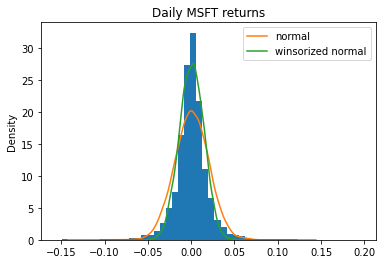

In [15]:
norm_msft = pd.Series(np.random.normal(ret.msft.mean(),ret.msft.std(),N))
msft_w = ret.msft
msft_w = msft_w.where(np.abs(msft_w)<0.04)
norm_msft_w = pd.Series(np.random.normal(msft_w.mean(),msft_w.std(),N))

plt.title('Daily MSFT returns')
plt.hist(ret.msft, bins=50, density=True);
norm_msft.plot.kde(label='normal');
norm_msft_w.plot.kde(label='winsorized normal');
plt.legend();

##### PG

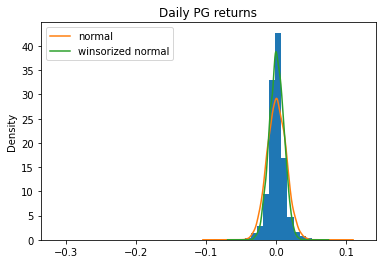

In [16]:
norm_pg = pd.Series(np.random.normal(ret.pg.mean(),ret.pg.std(),N))
pg_w = ret.pg
pg_w = pg_w.where(np.abs(pg_w)<0.04)
norm_pg_w = pd.Series(np.random.normal(pg_w.mean(),pg_w.std(),N))

plt.title('Daily PG returns')
plt.hist(ret.pg, bins=50, density=True);
norm_pg.plot.kde(label='normal');
norm_pg_w.plot.kde(label='winsorized normal');
plt.legend();

##### GE

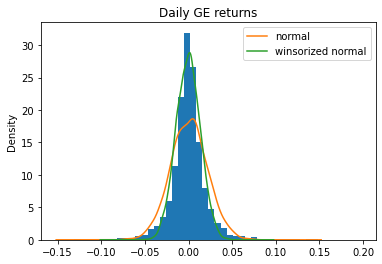

In [17]:
ge = ret['ge']
norm_ge = pd.Series(np.random.normal(ge.mean(),ge.std(),N))
ge_w = ge.where(np.abs(ge)<0.04)
norm_ge_w = pd.Series(np.random.normal(ge_w.mean(),ge_w.std(),N))

plt.title('Daily GE returns')
plt.hist(ge, bins=50, density=True);
norm_ge.plot.kde(label='normal');
norm_ge_w.plot.kde(label='winsorized normal');
plt.legend();

#### c)

In [27]:
print('95% VaR:',ret.quantile(.05),sep='\n')
print('\n99% VaR:',ret.quantile(.01),sep='\n')

95% VaR:
aapl   -0.037626
gs     -0.033718
msft   -0.028699
pg     -0.017755
ge     -0.031345
Name: 0.05, dtype: float64

99% VaR:
aapl   -0.064509
gs     -0.063170
msft   -0.054679
pg     -0.036085
ge     -0.060819
Name: 0.01, dtype: float64


In [71]:
var95 = ret.quantile(.05)
var99 = ret.quantile(.01)
k = ret.shape[1]

esf95 = [0 for i in range(k)]
esf99 = [0 for i in range(k)]
 
for i in range(k):
    sf95 = ret.iloc[:,i].where(ret.iloc[:,i]<var95[i])
    esf95[i] = np.mean(sf95)
    sf99 = ret.iloc[:,i].where(ret.iloc[:,i]<var99[i])
    esf99[i] = np.mean(sf99)

Esf95 = pd.DataFrame(columns=ret.columns)
Esf95.loc[0] = esf95
Esf99 = pd.DataFrame(columns=ret.columns)
Esf99.loc[0] = esf99

#Esf95.Index.rename('95')
print('95% Expected Shortfall:',Esf95,sep='\n')
print('\n99% Expected Shortfall:',Esf99,sep='\n')



95% Expected Shortfall:
       aapl        gs      msft       pg        ge
0 -0.057002 -0.052832 -0.045047 -0.03164 -0.050151

99% Expected Shortfall:
       aapl        gs      msft        pg        ge
0 -0.095091 -0.092138 -0.076757 -0.059015 -0.084405
